In [7]:
using Pkg
Pkg.add("Images")
Pkg.add("TestImages")
Pkg.add("Plots")
Pkg.add("LinearAlgebra")
using Plots, TestImages
include("../src/KelvinletsImage.jl")

 Resolving package versions...
  Updating `~/Desktop/Kelvinlets/KelvinletsImage.jl/Project.toml`
 [no changes]
  Updating `~/Desktop/Kelvinlets/KelvinletsImage.jl/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/Desktop/Kelvinlets/KelvinletsImage.jl/Project.toml`
 [no changes]
  Updating `~/Desktop/Kelvinlets/KelvinletsImage.jl/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/Desktop/Kelvinlets/KelvinletsImage.jl/Project.toml`
 [no changes]
  Updating `~/Desktop/Kelvinlets/KelvinletsImage.jl/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/Desktop/Kelvinlets/KelvinletsImage.jl/Project.toml`
 [no changes]
  Updating `~/Desktop/Kelvinlets/KelvinletsImage.jl/Manifest.toml`
 [no changes]


Main.KelvinletsImage

In [8]:
img = testimage("mandrill")
obj = KelvinletsImage.KelvinletsObject(img, 0.4, 1.0)

Main.KelvinletsImage.KelvinletsObject(0.07957747154594767, 0.033157279810811534, 11.599726720946931, 512, 512, RGB{FixedPointNumbers.Normed{UInt8,8}}[RGB{N0f8}(0.643,0.588,0.278) RGB{N0f8}(0.247,0.224,0.122) … RGB{N0f8}(0.553,0.667,0.396) RGB{N0f8}(0.702,0.737,0.463); RGB{N0f8}(0.471,0.49,0.243) RGB{N0f8}(0.529,0.38,0.129) … RGB{N0f8}(0.533,0.624,0.502) RGB{N0f8}(0.471,0.541,0.29); … ; RGB{N0f8}(0.494,0.663,0.659) RGB{N0f8}(0.459,0.592,0.592) … RGB{N0f8}(0.388,0.271,0.337) RGB{N0f8}(0.314,0.247,0.278); RGB{N0f8}(0.035,0.043,0.047) RGB{N0f8}(0.039,0.047,0.043) … RGB{N0f8}(0.008,0.02,0.0) RGB{N0f8}(0.016,0.02,0.008)])

# Applying a Regular Area Deformation

Simply dividing the image into a *3x3* GRID, where each block is deformed by an edge or a set of border pixels.

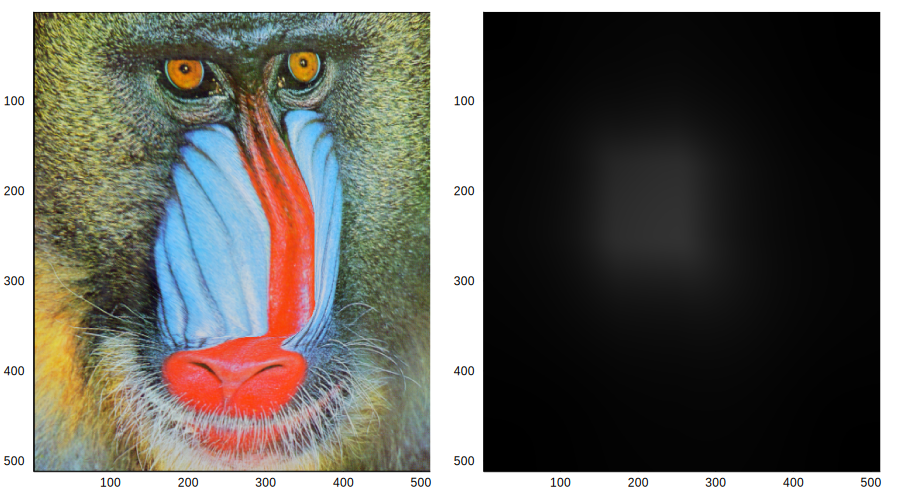

In [23]:
newImageAreaVar = KelvinletsImage.grabRectangle(obj, [175 175; 250 250], [100., 100.], 50., KelvinletsImage.__applyAreaVariation__, false)
heatmapAreaVar = KelvinletsImage.grabRectangle(obj, [175 175; 250 250], [100., 100.], 50., KelvinletsImage.__applyAreaVariation__, true)
plot(plot(newImageAreaVar), plot(heatmapAreaVar), size=(900, 500))

# Applying Area Deformation by Proximity
Dividing image into 4 quadrants and deform each pixel to its most close edge.

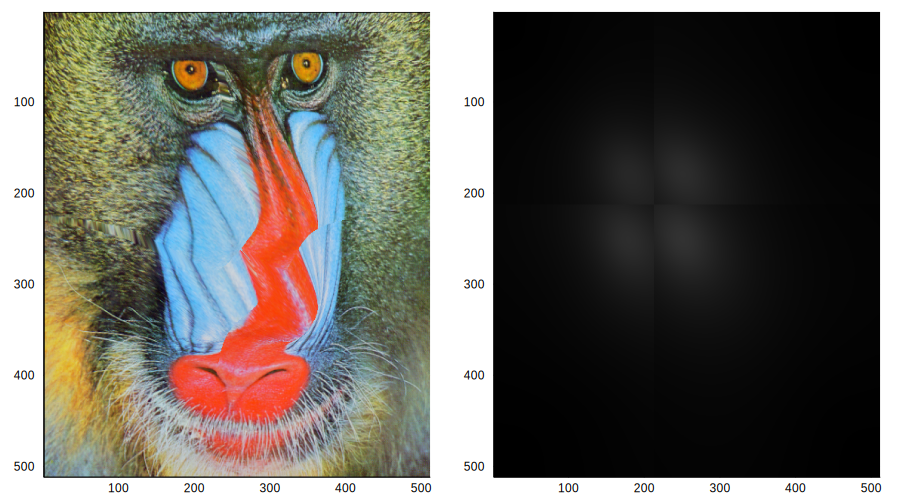

In [25]:
newImageProximity = KelvinletsImage.grabRectangle(obj, [175 175; 250 250], [100., 100.], 50., KelvinletsImage.__applyCloserAreaVariation__, false)
heatmapProximity = KelvinletsImage.grabRectangle(obj, [175 175; 250 250], [100., 100.], 50., KelvinletsImage.__applyCloserAreaVariation__, true)
plot(plot(newImageProximity), plot(heatmapProximity), size=(900, 500))

# Applying Area Deformation by Proximity Average Between Edges
Pondering the distance between the to be deformed point and each edge to produce variation.

$\Delta$ = $(1/d_1 * variation_1 + 1/d_2 * variation_2 + 1/d_3 * variation_3 + 1/d_4 * variation_4) / (1/d_1 + 1/d_2 + 1/d_3 + 1/d_4)$

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


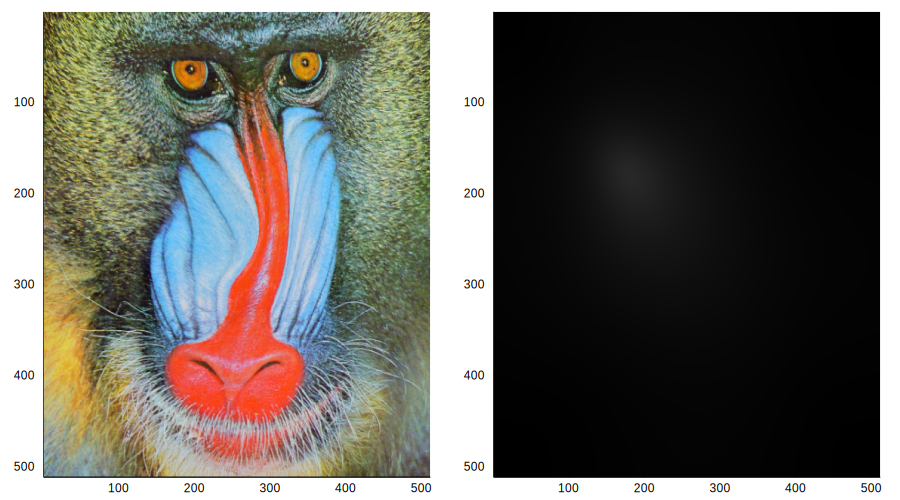

In [31]:
newImageProxAvg = KelvinletsImage.grabRectangle(obj, [175 175; 250 250], [100., 100.], 50., KelvinletsImage.__applyPonderedAvgAreaVariation__, false)
heatmapProxAvg = KelvinletsImage.grabRectangle(obj, [175 175; 250 250], [100., 100.], 50., KelvinletsImage.__applyPonderedAvgAreaVariation__, true)
plot(plot(newImageProxAvg), plot(heatmapProxAvg), size=(900, 500))

# Applying Area Deformation by Generating a New Reference Point Calculated Between Edges
Has almost the same idea as the one before. However, instead of generating variation, it generates a new point from which the variation will be calculated, so it doesn't overlap a variation with another in the opposite direction.

newReference = $(1/d_1 * pos_1 + 1/d_2 * pos_2 + 1/d_3 * pos_3 + 1/d_4 * pos_4) / (1/d_1 + 1/d_2 + 1/d_3 + 1/d_4)$

$\Delta$ = variationFunction([y, x], newReference)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


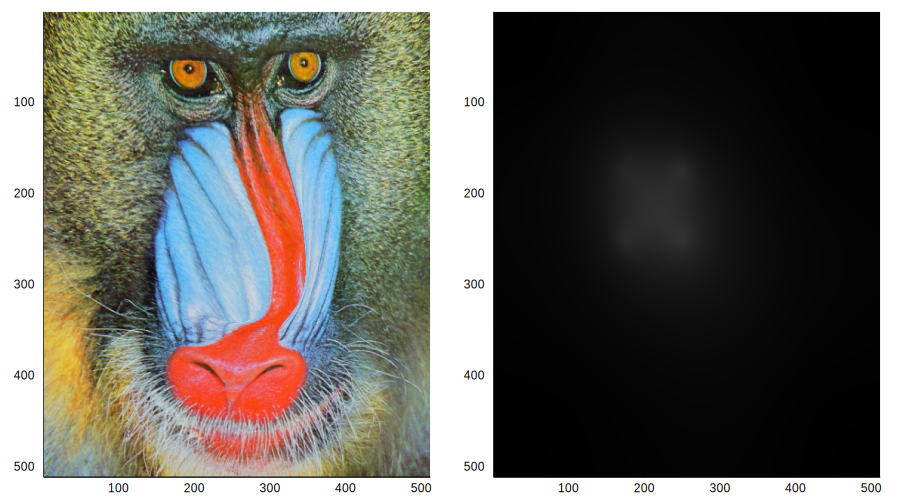

In [32]:
newImageEdge = KelvinletsImage.grabRectangle(obj, [175 175; 250 250], [100., 100.], 50., KelvinletsImage.__applyEdgeBasedAreaVariation__, false)
heatmapEdge = KelvinletsImage.grabRectangle(obj, [175 175; 250 250], [100., 100.], 50., KelvinletsImage.__applyEdgeBasedAreaVariation__, true)
plot(plot(newImageEdge), plot(heatmapEdge), size=(900, 500))

# Applying Area Deformation by Generating a New Reference Point Calculated Between Every Point in Perimeter
Has almost the same idea as the one before. However, instead of generating a new point by calculating the pondered average between the edges, it generates a new point by calculating the pondered average between every point in the rectangle's perimeter.

newReference = $((\sum_{i=minX}^{maxX} 1/||[i, j] - [minY, i]|| * [minY, i]) +
                 (\sum_{i=minX + 1}^{maxX - 1} 1/||[i, j] - [maxY, i]|| * [maxY, i]) +
                 (\sum_{i=minY + 1}^{maxY} 1/||[i, j] - [i, minX]|| * [i, minX]) +
                 (\sum_{i=minY + 1}^{maxY} 1/||[i, j] - [i, maxX]|| * [i, maxX]))/(
                 (\sum_{i=minX}^{maxX} 1/||[i, j] - [minY, i]||) +
                 (\sum_{i=minX + 1}^{maxX - 1} 1/||[i, j] - [maxY, i]||) +
                 (\sum_{i=minY + 1}^{maxY} 1/||[i, j] - [i, minX]||) +
                 (\sum_{i=minY + 1}^{maxY} 1/||[i, j] - [i, maxX]||))$

$\Delta$ = variationFunction([y, x], newReference)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:21
Progress: 100%|█████████████████████████████████████████| Time: 0:00:21


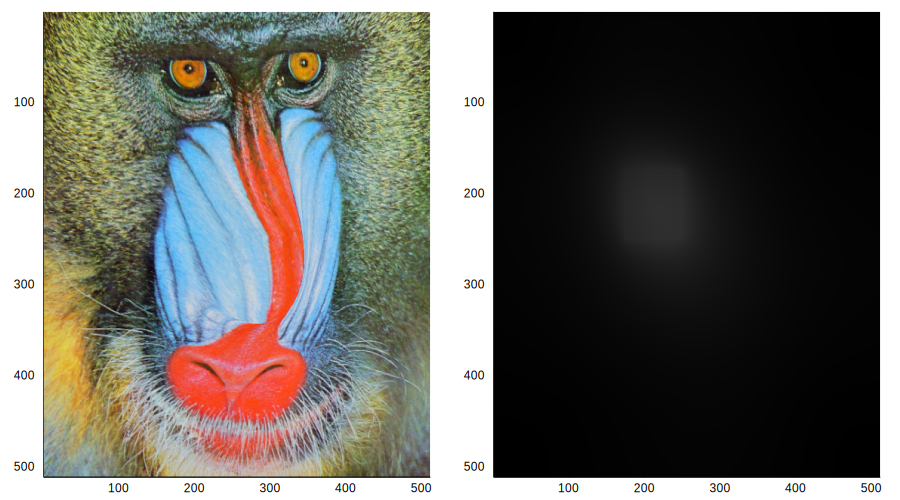

In [33]:
newImagePerim = KelvinletsImage.grabRectangle(obj, [175 175; 250 250], [100., 100.], 50., KelvinletsImage.__applyPerimeterBasedAreaVariation__, false)
heatmapPerim = KelvinletsImage.grabRectangle(obj, [175 175; 250 250], [100., 100.], 50., KelvinletsImage.__applyPerimeterBasedAreaVariation__, true)
plot(plot(newImagePerim), plot(heatmapPerim), size=(900, 500))